Thresholding is used to partition the background and foreground of grayscale images, by essentially making them black and white. We compare each pixel to a given threshold value.

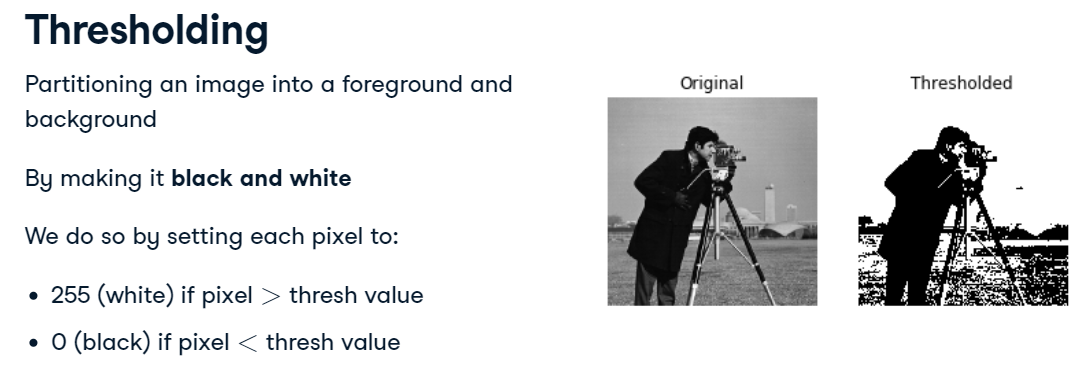

If the pixel is less than that value, we turn it white. If it's greater; we turn it black.

Thresholding is the simplest method of image segmentation. Thresholding let us isolate elements and is used in object detection, facial recognition, and other applications.

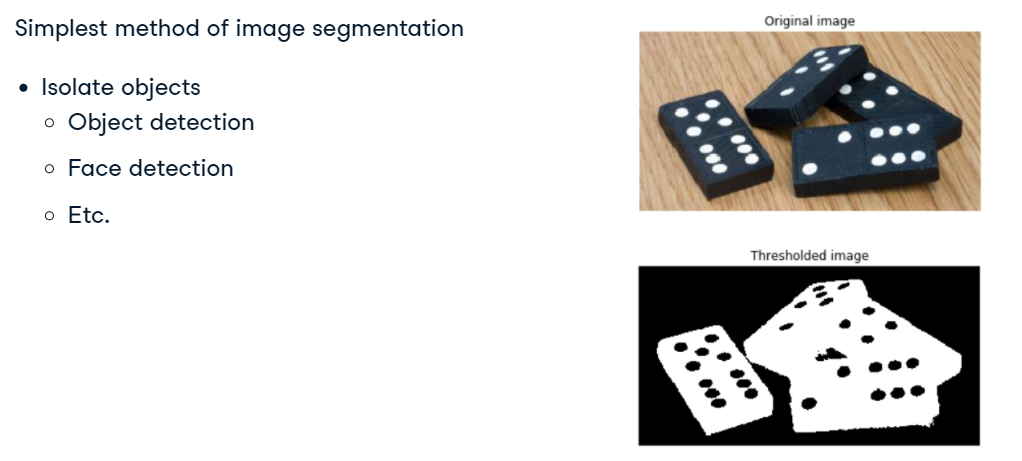 

It works best in high-contrast grayscale images. To threshold color images, we must first convert them to grayscale.

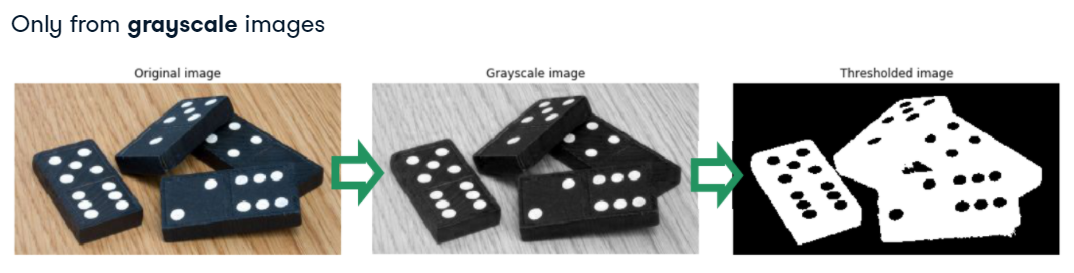

Let's see how to apply it. Once an image is loaded, we need to set the thresh value. Temporarily set it to 127, mid point between 0 and 255. We apply thresholding to an image by using the greater than operator followed by the thresh. Finally, show the thresholded image using show_image().

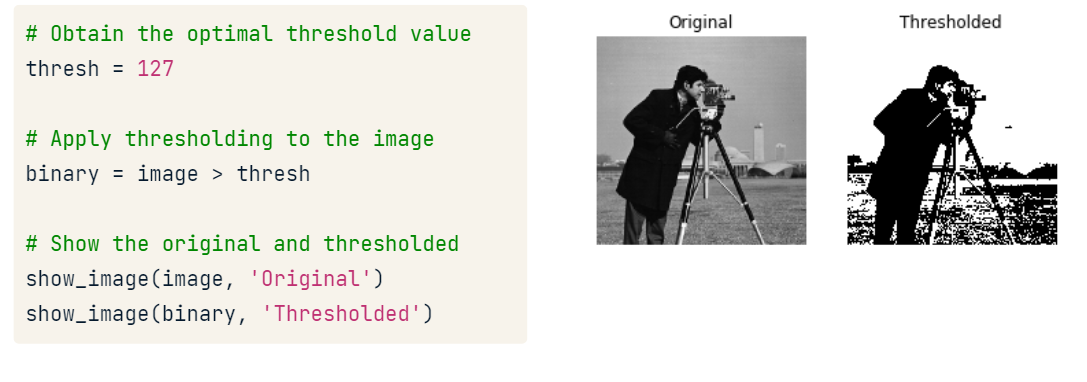

We can also apply inverted thresholding, which is just inverting the color. We apply it just as we do in thresholding, except we use "<=" operator instead of ">". Here the resulting image is also binary but the background is black and foreground white.

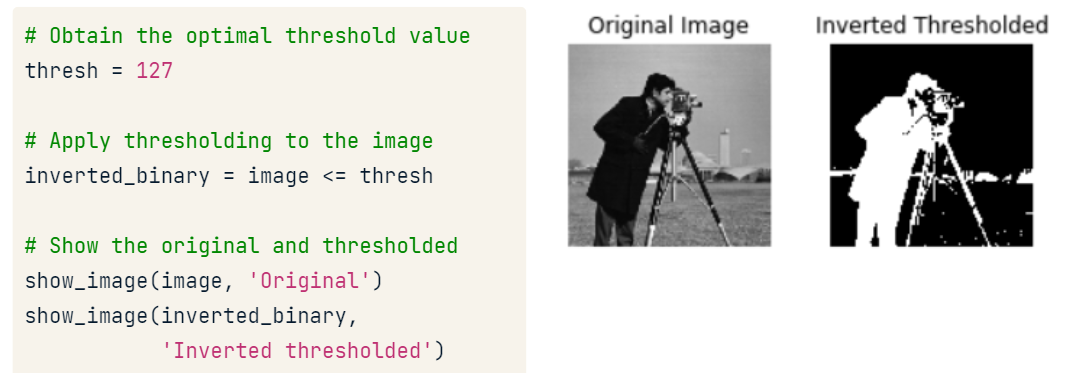

There are two categories of thresholding in scikit-image: Global or histogram-based, which is good for images that have relatively uniform backgrounds. Adaptive or local, which is best for images where the background is not easily differentiated, with uneven background illumination. Note that local is slower than global thresholding.

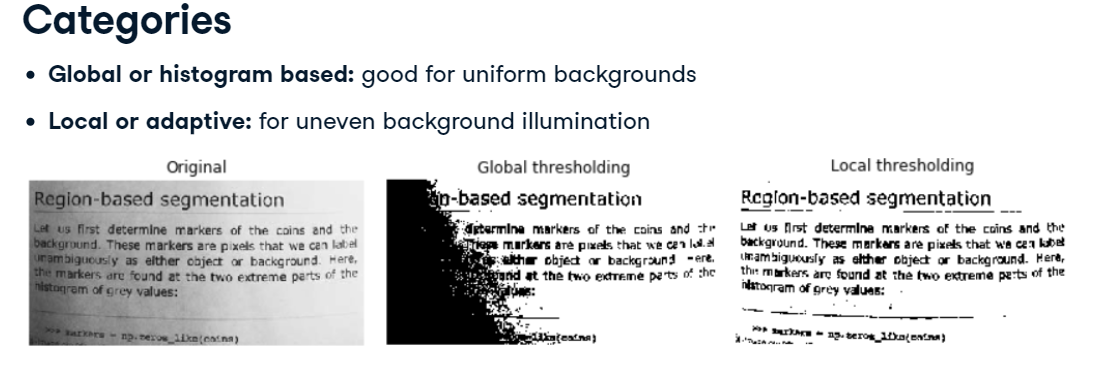

Here we have an image to compare. In this case, it seems that local is without a doubt the best option.

**What if I want to try more algorithms?** 

Well scikit-image includes a function that evaluates several global algorithms, so that you can choose the one that gives you best results: the try_all_threshold function from filters module.

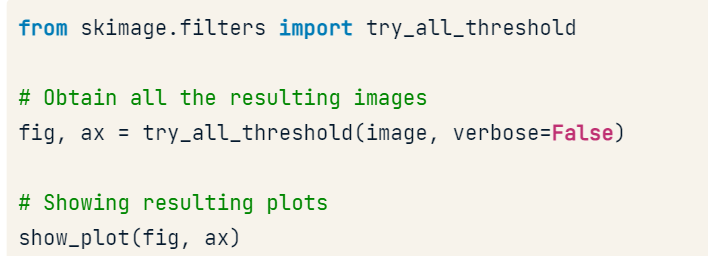

Here we import it, use the function by passing the image and set verbose to False so it doesn't print function name for each method. And show results.

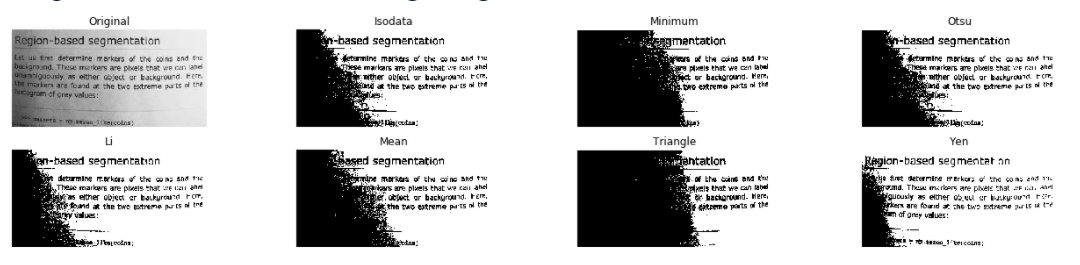

It will use seven global algorithms, so here we see first the original image followed by the resulting images of the thresholding methods. We cover only the otsu. So this is a easy way the rest!

When the background of an image seems uniform, global thresholding works best. Previously, we arbitrarily set the thresh value, but we can also calculate the optimal value. For that we import the threshold_otsu() function from filters module. Then obtain the optimal global thresh value by calling this function. Apply the local thresh to the image. And that's it!

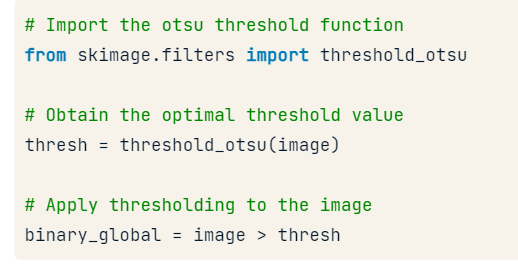

Lets see the image.

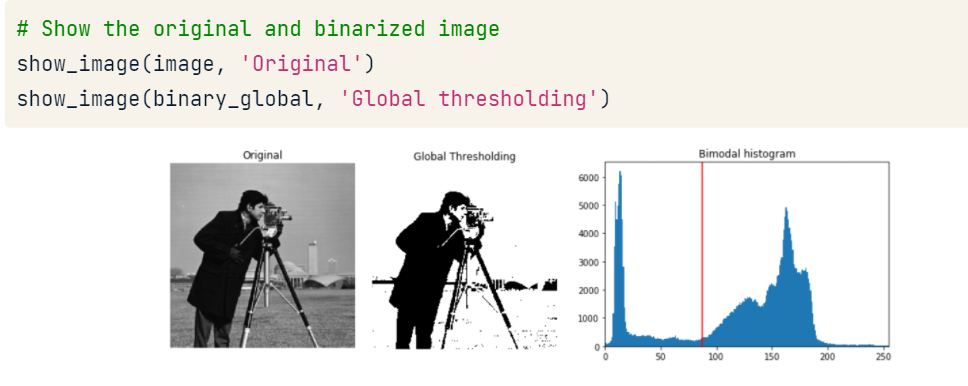

We see the resulting binarized image, next to the original to compare it. We see how the optimal thresh is spotted by a red line in the histogram of the image.

If the image doesn't have high contrast or the background is uneven, local thresholding produces better results. Import threshold_local(), also from filters. With this function, we calculate thresholds in small pixel regions surrounding each pixel we are binarizing. So we need to specify a block_size to surround each pixel; also known as local neighborhoods. And an optional offset, that's a constant subtracted from the mean of blocks to calculate the local threshold value. Here in the threshold_local function we set a block_size of 35 pixels and an offset of 10. Then apply that local thresh.

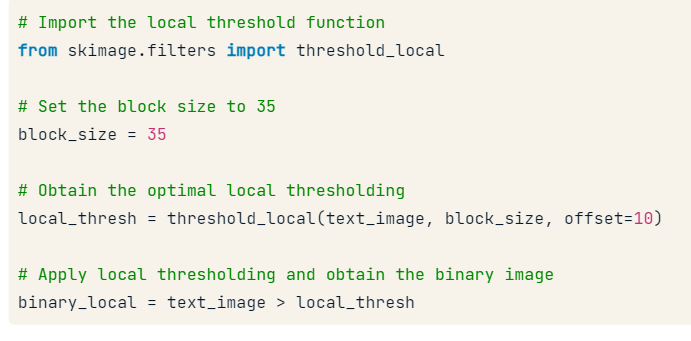

Showing the original and the resulting image, we can see it works well in this image that has different lighting conditions.

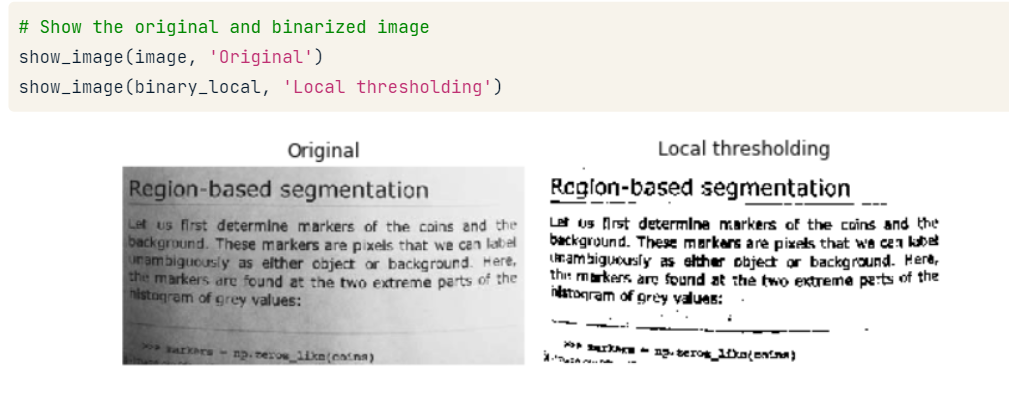

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

### Apply global thresholding
Apply global thresholding
In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using `threshold_otsu()` and apply it to the image.

You'll see the resulting binarized image when using the `show_image()` function, previously explained.
![chess](./images/bw.jpg)

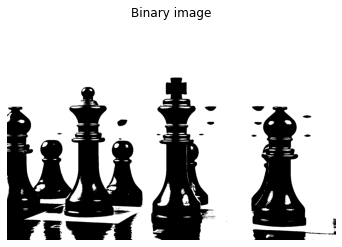

In [3]:
from skimage.filters import threshold_otsu
from skimage import color
chess_pieces_image = plt.imread('./images/bw.jpg')

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

We just converted the image to binary and we can separate the foreground from the background.

### When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using `threshold_otsu()`. However, if there's uneven background illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.
![page](./images/text_page.png)

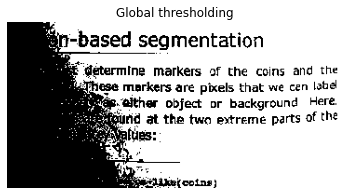

In [4]:
page_image = plt.imread('./images/text_page.png')

# Make the image grayscale using rgb2gray
page_image = color.rgb2gray(page_image)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

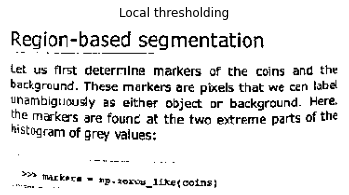

In [5]:
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

### Trying other methods
As we discussed before, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.
![fruit](./images/fruits-2.jpg)

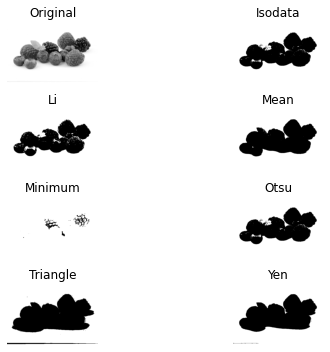

In [7]:
from skimage.filters import try_all_threshold

fruits_image = plt.imread('./images/fruits-2.jpg')

# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False);

We can see, this image works good with some global thresholding methods (like the "Yen" and "Mean") and not so well in others, (like the "Minimum").


### Apply thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

![tool](./images/shapes52.jpg)
What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

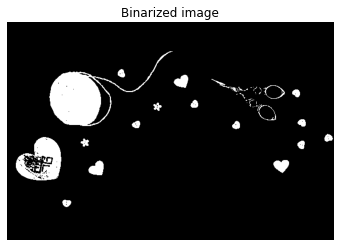

In [8]:
tools_image = plt.imread('./images/shapes52.jpg')

# Turn the image grayscale
gray_tools_image = color.rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

By using a global thresholding method, we obtained the precise binarized image. If we would have used local instead nothing would have been segmented.